In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
def list_record_file(file_list,path):
    record_list = []
    for i in range(len(file_list)):
        current_file_abs_path = path+"/"+file_list[i]
        if current_file_abs_path.endswith(".jpeg"):
            record_list.append(current_file_abs_path)
        else:
            pass
    return record_list

def record_auto_traversal(path):
    current_folder_filename_list = os.listdir(path) 
    if current_folder_filename_list != None:
      
        record_list = list_record_file(current_folder_filename_list,path)
       
    return record_list

In [3]:
pneumonia_xray=[]
normal_xray=[]
pos=123
count_p=0
count_n=0

In [4]:
path=r'...\chest_xray'

cwd=path
train_dir=cwd +'/train'
class_names = os.listdir(train_dir)


for i in class_names:
    train_dir=train_dir+"/"+i
    record_list=record_auto_traversal(train_dir)
    for j in range(0,len(record_list)):
        
        if i == 'PNEUMONIA' and count_p <5 and j>pos:
            pneumonia_xray.append(record_list[j])
            count_p += 1
        if i == 'NORMAL' and count_n <5and j>pos:
            normal_xray.append(record_list[j])
            count_n += 1
        
        img  = Image.open(record_list[j])
        img=img.resize((224,224))
        rgbimg = img.convert("RGB")
        rgbimg.save(record_list[j])
        img=np.array(rgbimg)
        

    train_dir=cwd +'/train'
    
Train_df=pd.DataFrame()

for i in range(0,len(class_names)):
    train_dir=train_dir+"/"+class_names[i]
    record_list=record_auto_traversal(train_dir)
    Train_df=Train_df.append(pd.DataFrame(dict(label=[i]*len(record_list), address=record_list )),ignore_index=True)
    train_dir=cwd +'/train'
Train_df=Train_df.sample(frac=1).reset_index(drop=True)


print("DONE!")

DONE!


In [5]:
cwd=path

test_dir= cwd+ '/test'
class_names = os.listdir(test_dir)


for i in class_names:
    test_dir=test_dir+"/"+i
    record_list=record_auto_traversal(test_dir)
    for j in range(0,len(record_list)):
        
        if i == 'PNEUMONIA' and count_p <9 and j>pos:
            pneumonia_xray.append(record_list[j])
            count_p += 1
        if i == 'NORMAL' and count_n <9 and j>pos:
            normal_xray.append(record_list[j])
            count_n += 1
        
        img  = Image.open(record_list[j])
        img=img.resize((224,224)) 
        rgbimg = img.convert("RGB")
        rgbimg.save(record_list[j])
        img=np.array(rgbimg)
       
    test_dir=cwd +'/test'
    
Test_df=pd.DataFrame()

for i in range(0,len(class_names)):
    test_dir=test_dir+"/"+class_names[i]
    record_list=record_auto_traversal(test_dir)
    Test_df = Test_df.append(pd.DataFrame(dict(label=[i]*len(record_list), address=record_list )),ignore_index=True)
    test_dir=cwd +'/test'
Test_df=Test_df.sample(frac=1).reset_index(drop=True)

print("DONE!")

DONE!



Pneumonia X-Ray



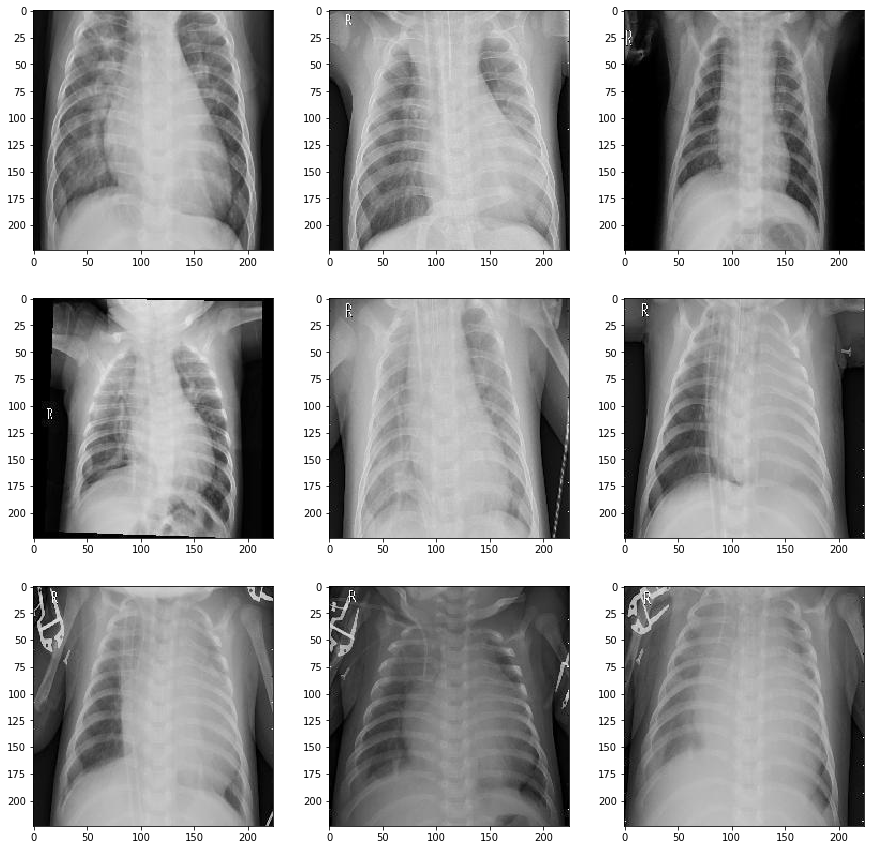


Normal X-Ray



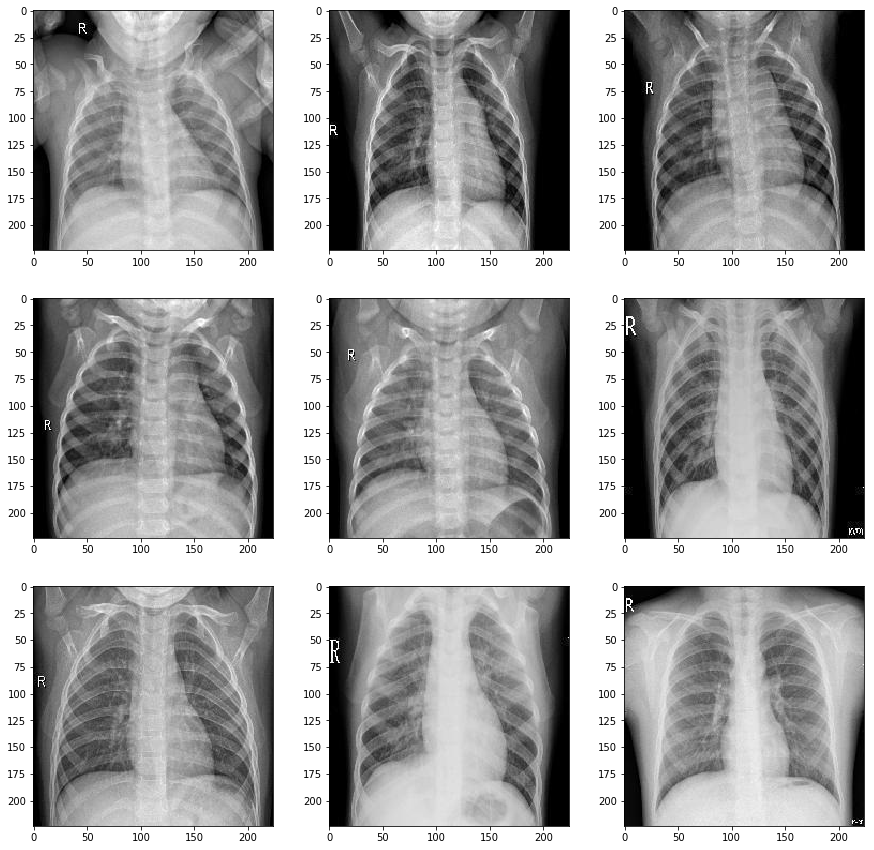

In [6]:
amount = 9
lines = 3
columns = 3

fig = plt.figure(figsize=(15,15))
print('\nPneumonia X-Ray\n')
for i in range(0,amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(plt.imread(pneumonia_xray[i]), cmap='binary')
        
plt.show()

print('\nNormal X-Ray\n')
fig = plt.figure(figsize=(15,15))
for i in range(0,amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(plt.imread(normal_xray[i]), cmap='binary')
        
plt.show()

In [7]:
pneumonia_count=0
for i in Train_df['label']:
    if i ==1:
        pneumonia_count+=1
normal_count = len(Train_df) - pneumonia_count

([<matplotlib.axis.XTick at 0x1c37e6fc710>,
 <a list of 2 Text xticklabel objects>)

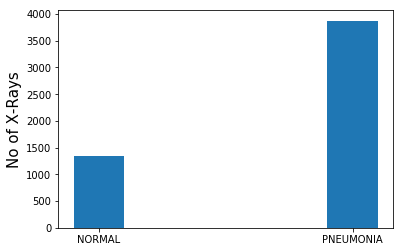

In [8]:
index = np.arange(len(class_names))

plt.bar(index,[normal_count,pneumonia_count],width=.2)
plt.ylabel('No of X-Rays', fontsize=15)
plt.xticks(index,class_names , fontsize=10)


In [9]:
for i in range(0,len(Train_df['label'])):
    if Train_df['label'][i] ==1:
        if normal_count <=0:
            Train_df = Train_df.drop(i)
        normal_count -= 1
Train_df=Train_df.reset_index()

In [10]:
Train_df = Train_df.sample(frac=1).reset_index(drop=True)
Train_df=Train_df.drop('index',axis=1)

In [11]:
pneumonia_count=0
for i in Train_df['label']:
    if i ==1:
        pneumonia_count+=1
normal_count = len(Train_df) - pneumonia_count

([<matplotlib.axis.XTick at 0x1c37e7bdba8>,
 <a list of 2 Text xticklabel objects>)

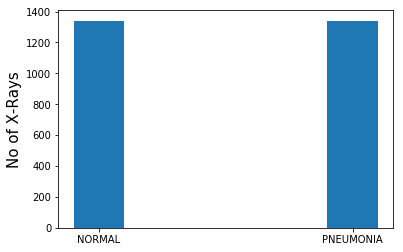

In [12]:
index = np.arange(len(class_names))

plt.bar(index,[normal_count,pneumonia_count],width=.2)
plt.ylabel('No of X-Rays', fontsize=15)
plt.xticks(index,class_names , fontsize=10)


In [13]:
Train_df.to_csv('Train_pneumonia.csv')
Test_df.to_csv('Test_pneumonia.csv')